In [88]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
import folium
import pickle
from sodapy import Socrata
from datetime import datetime


%matplotlib inline

In [89]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

In [98]:
params = {'$limit': 41177}

In [99]:
response = requests.get(endpoint, params = params)

In [100]:
response

<Response [200]>

In [101]:
res = response.json()

In [102]:
res

[{'month_name': 'January',
  'year': '2014',
  'query_count': '223',
  'query_text': 'ebid'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '112',
  'query_text': 'property maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '90',
  'query_text': 'property tax'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '76',
  'query_text': 'jobs'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '75',
  'query_text': 'employment'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '73',
  'query_text': 'human resources'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '62',
  'query_text': 'police'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '61',
  'query_text': 'criminal court clerk'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '53',
  'query_text': 'media releases'},
 {'mon

In [104]:
allresults = pd.DataFrame(res)
allresults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41177 entries, 0 to 41176
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month_name   41177 non-null  object
 1   year         41177 non-null  object
 2   query_count  41176 non-null  object
 3   query_text   41177 non-null  object
 4   month        12677 non-null  object
dtypes: object(5)
memory usage: 1.6+ MB


In [105]:
maps_results = allresults.loc[allresults['query_text'] == 'maps']
maps_results

,month_name,year,query_count,query_text,month
2,January,2014,97,maps,NaN
503,February,2014,140,maps,NaN
1005,March,2014,144,maps,NaN
1503,April,2014,152,maps,NaN
2003,May,2014,119,maps,NaN
...,...,...,...,...,...
37030,June,2020,136,maps,6
38081,August,2020,125,maps,8
39011,October,2020,127,maps,10
39196,November,2020,86,maps,11


In [106]:
dates = []
for index_value, row_value in maps_results.iterrows():
    if row_value['month_name'] == "January":
        month = 1
    elif row_value['month_name'] == "February":
        month = 2
    elif row_value['month_name'] == "March":
        month = 3
    elif row_value['month_name'] == "April":
        month = 4
    elif row_value['month_name'] == "May":
        month = 5
    elif row_value['month_name'] == "June":
        month = 6
    elif row_value['month_name'] == "July":
        month = 7
    elif row_value['month_name'] == "August":
        month = 8
    elif row_value['month_name'] == "September":
        month = 9
    elif row_value['month_name'] == "October":
        month = 10
    elif row_value['month_name'] == "November":
        month = 11
    elif row_value['month_name'] == "December":
        month = 12
    datestring = str(str(month) + '-' + row_value['year'])
    dt = datetime.strptime(datestring, '%m-%Y')
    dates += [dt]
type(dates[0])

datetime.datetime

In [107]:
maps_results['date'] = dates

<ipython-input-107-b9f674c41151>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maps_results['date'] = dates


In [108]:
maps_results['query_count'] = maps_results['query_count'].astype('int')

<ipython-input-108-fd91aaf7a268>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maps_results['query_count'] = maps_results['query_count'].astype('int')


Text(0.5, 1.0, "Searches for 'maps' by Month")

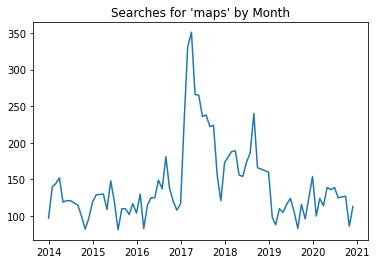

In [109]:
maps_results = maps_results.sort_values('date')
plt.plot('date', 'query_count', data = maps_results)
plt.title("Searches for 'maps' by Month")

In [110]:
allresults['query_text'].value_counts()

stormwater                                 83
property                                   82
im                                         82
planning commission                        81
employment                                 81
                                           ..
fire permit fees                            1
WATER, SEWERS AND OTHER PUBLIC SERVICES     1
bordeaux transition pay 2014                1
competitive bidding                         1
Register of Deeds                           1
Name: query_text, Length: 9102, dtype: int64